In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def get_response(g, H, pad_zeros=True, return_padded=False):
    """Convolves g with H in the frequency domain.
    
    Parameters
    ----------
    g : array_like
        The input signal to be convolved.
    H : array_like
        The GTF/filter to be applied in the frequency domain.
    pad_zeros : bool, optional
        If True, pads g with zeros to match the size of H.
        Default is True.
    return_padded : bool, optional
        If True, returns the padded version of g.
        Default is False.
    """
    if g.size < H.size and pad_zeros:
        N_pad = H.size - g.size
        pad_before = int(N_pad * 0.1)
        pad_after = N_pad - pad_before
        g = np.pad(g, (pad_before, pad_after), mode='constant')
    
    X = np.fft.fftshift(np.fft.fft(g))
    Y = X*H
    y = np.real(np.fft.ifft(np.fft.ifftshift(Y)))
    
    if pad_zeros and not return_padded:
        y = y[pad_before:-pad_after]

    return y

In [3]:
npz = np.load('./example_GIRF.npz')
Hz0 = npz['Hz0']  # GTF z->0
Hzz = npz['Hzz']  # GTF z->z

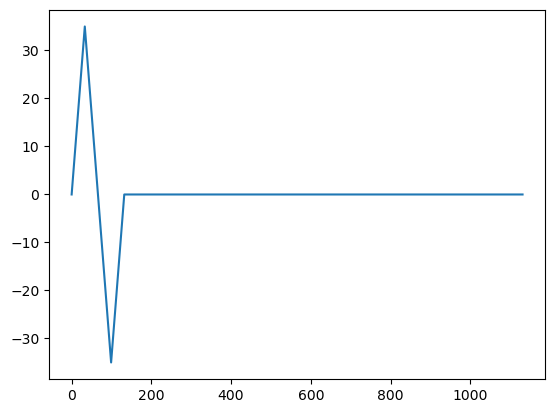

In [54]:
# Simple bipolar
dt = 10e-6  # [s]
gmax = 35  # [mT/m]
smax = 100  # [T/m/s]

# Make bipolar gradient
gg = np.hstack([
                np.linspace(0,gmax,int(gmax/smax/dt/1000))[:-1],
                np.linspace(gmax,0,int(gmax/smax/dt/1000))[:-1],
                np.linspace(0,-gmax,int(gmax/smax/dt/1000))[:-1],
                np.linspace(-gmax,0,int(gmax/smax/dt/1000)),
                ])

# Zeropad after by 10ms
N_bipolar = gg.size
N_zeropad = int(10e-3/dt)
gg = np.hstack([gg, np.zeros(N_zeropad)])

plt.figure()
plt.plot(gg)

Text(0, 0.5, 'Gradient [mT/m]')

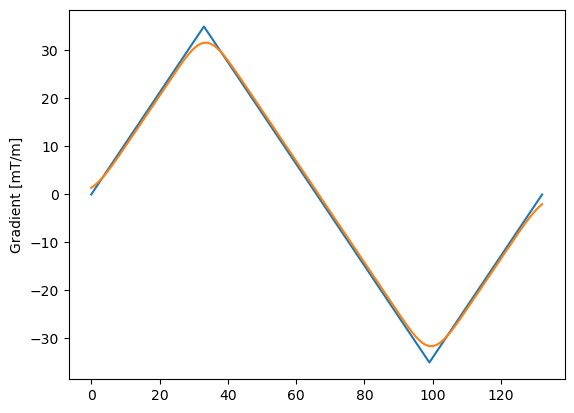

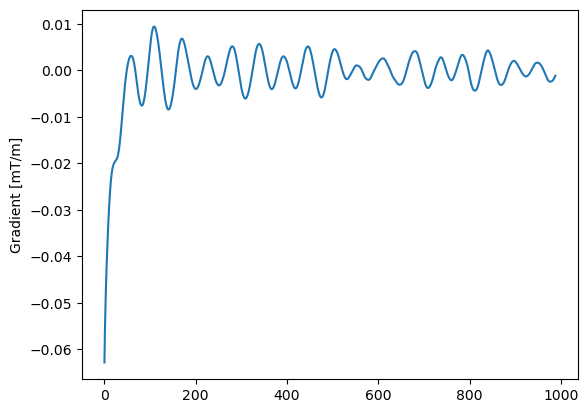

In [ ]:
gg_pred = get_response(gg, Hzz)

# Plot the predicted bipolar
# NOTE: This is overly smoothed as smoother GIRFS work better for background prediction
#        I will try to update with a better GIRF for this application.

plt.figure()
plt.plot(gg[:N_bipolar])
plt.plot(gg_pred[:N_bipolar])
plt.ylabel('Gradient [mT/m]')

# Plot the prediction after the bipolar
plt.figure()
plt.plot(gg_pred[N_bipolar+10:])
plt.ylabel('Gradient [mT/m]')

Text(0, 0.5, 'B0 [mT]')

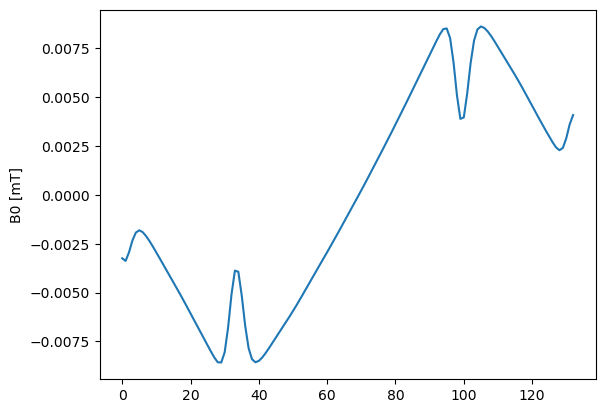

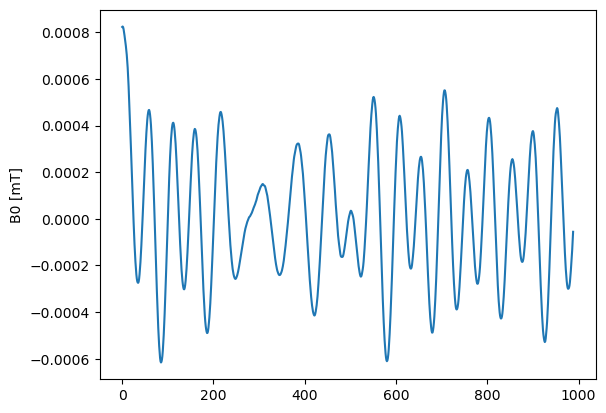

In [ ]:
# Same as last cell except using the GTF z->0
gg_pred = get_response(gg, Hz0)

# Plot the predicted bipolar
plt.figure()
plt.plot(gg_pred[:N_bipolar])
plt.ylabel('B0 [mT]')

# Plot the prediction after the bipolar
plt.figure()
plt.plot(gg_pred[N_bipolar+10:])
plt.ylabel('B0 [mT]')